In [1]:
# Importing necessary libraries

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
!pip install opencv-python-headless
!pip install tensorflow
import cv2
import os
import csv
import random


import sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score


In [2]:
# Setting the directory path for the dataset
dataset_path = 'C:\\Blood_Data\\bloodcells_dataset'


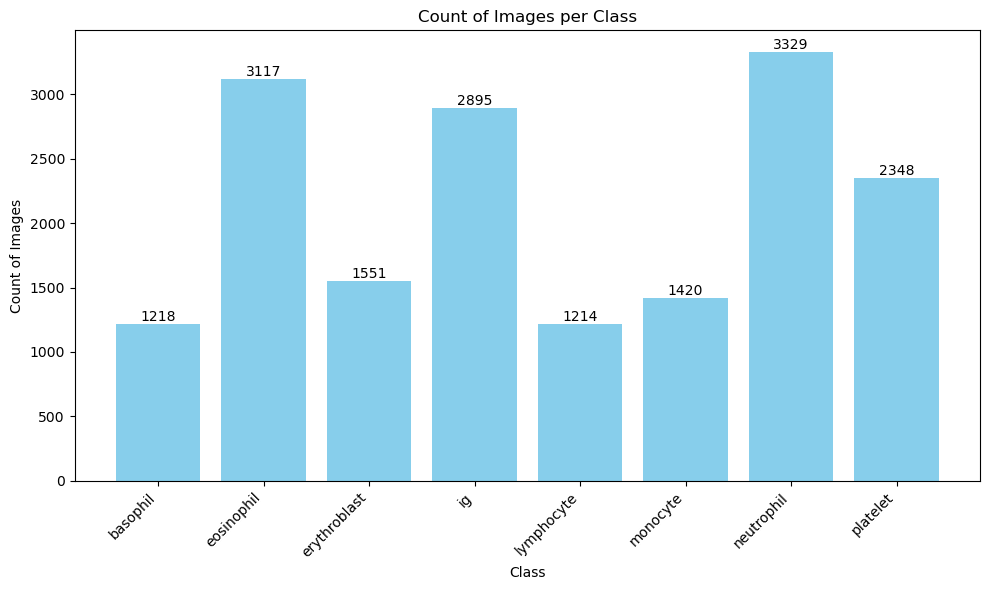

In [3]:
# Counting images per class
class_names = []
counts = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        num_files = len([filename for filename in os.listdir(class_dir)
                         if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))])
        class_names.append(class_name)
        counts.append(num_files)
# Displaying bar plot for counting images per class
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, counts, color='skyblue')
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', color='black')
plt.xlabel('Class')
plt.ylabel('Count of Images')
plt.title('Count of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

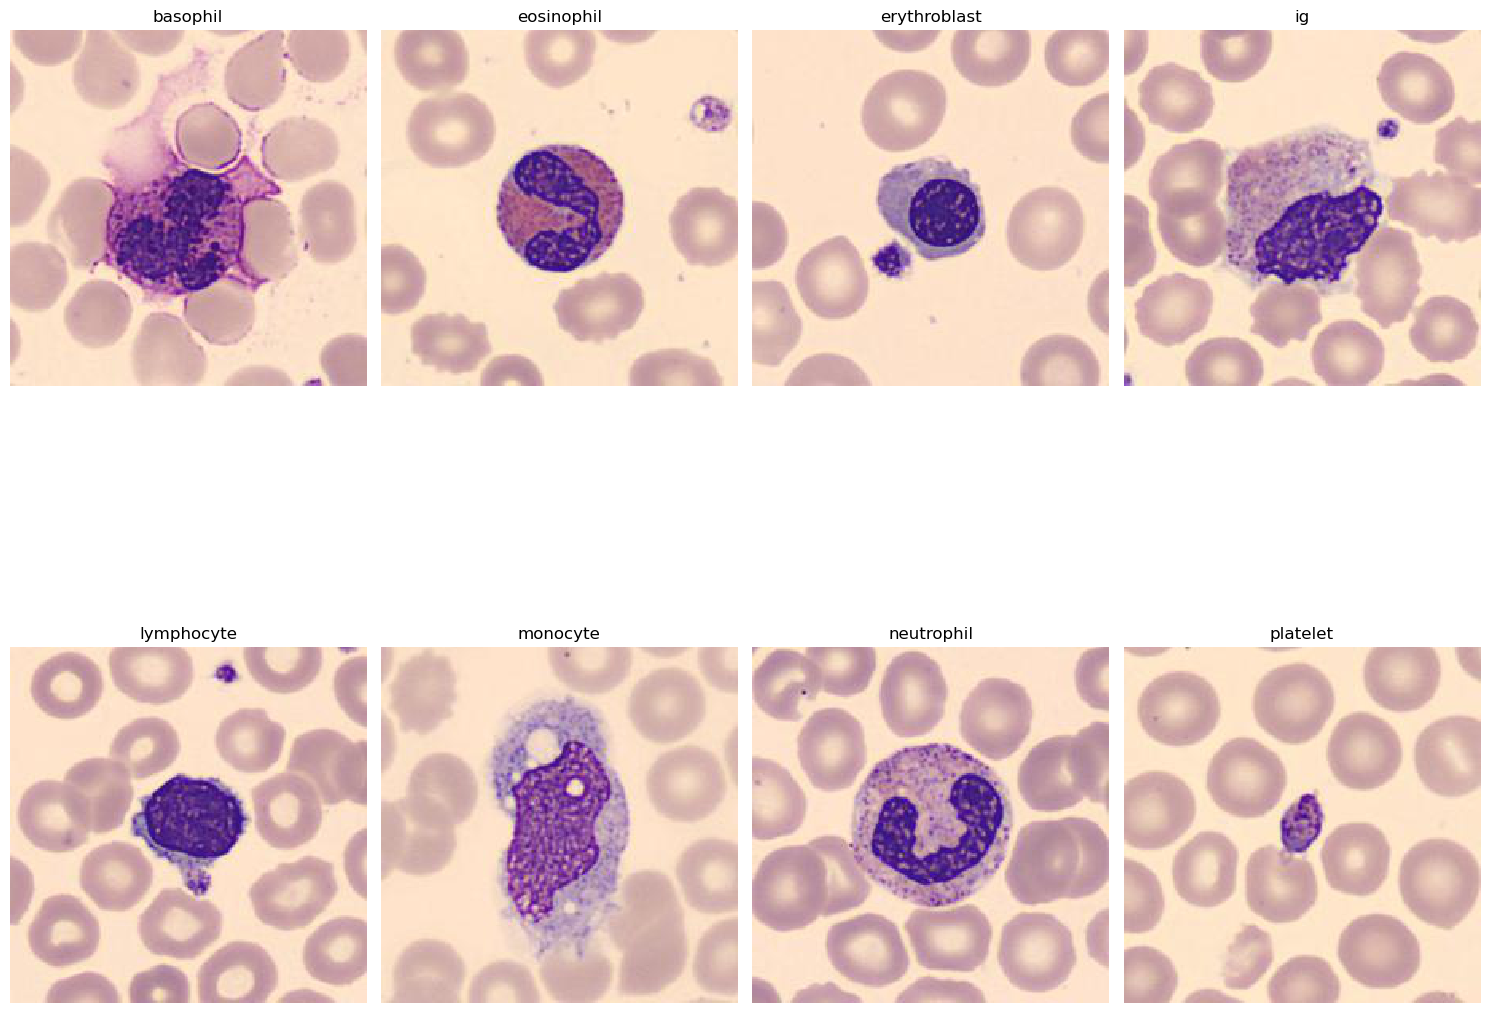

In [4]:
# Displaying random images per class
num_rows = 2
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
classes = os.listdir(dataset_path)
for i, class_name in enumerate(classes):
    row = i // num_cols
    col = i % num_cols
    class_path = os.path.join(dataset_path, class_name)
    random_image = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, random_image)
    with Image.open(image_path) as img:
        axs[row, col].imshow(img, interpolation='nearest')
        axs[row, col].set_title(class_name)
        axs[row, col].axis('off')
plt.tight_layout()
plt.show()

Shape of images array: (17092, 224, 224, 3)
Shape of labels array: (17092,)


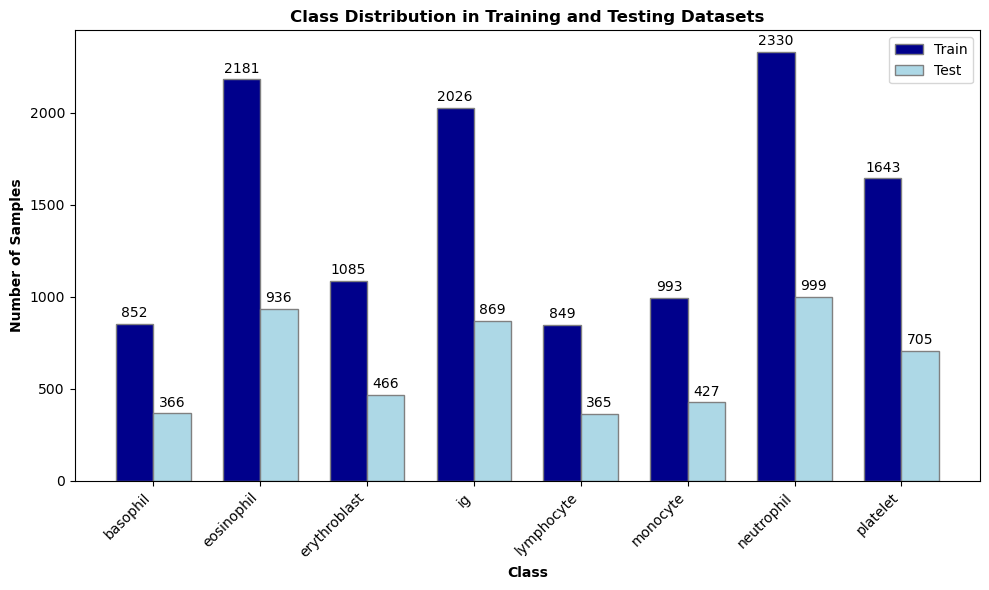

In [5]:
# Splitting the dataset by stratified random sampling
# Initialize lists to store images and labels
images = []
labels = []

# Iterate through all directories in the main directory
for class_name in os.listdir(dataset_path):
    # Construct the full path of the current directory
    class_dir = os.path.join(dataset_path, class_name)

    # Check if the path is a directory
    if os.path.isdir(class_dir):
        # Iterate through all files in the class directory
        for filename in os.listdir(class_dir):
            # Load the image
            image_path = os.path.join(class_dir, filename)
            image = Image.open(image_path)
            
            # Resize the image if needed (optional)
            image = image.resize((224, 224))

            # Convert the image to numpy array and store it
            images.append(np.array(image))

            # Store the label
            labels.append(class_name)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shapes of images and labels arrays
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)


# Step 1: Count the samples in each class
class_counts = {}
for label in np.unique(labels):
    class_counts[label] = np.sum(labels == label)

# Step 2: Determine the desired split ratio
split_ratio = 0.7  # 70% for training, 30% for testing

# Step 3: Calculate the number of samples for each split
train_class_counts = {label: int(count * split_ratio) for label, count in class_counts.items()}
test_class_counts = {label: count - train_class_counts[label] for label, count in class_counts.items()}

# Step 4: Stratified sampling
train_indices = []
test_indices = []
for label in np.unique(labels):
    label_indices = np.where(labels == label)[0]
    train_label_indices, test_label_indices = train_test_split(label_indices,
                                                              train_size=train_class_counts[label],
                                                              test_size=test_class_counts[label],
                                                              stratify=labels[label_indices])
    train_indices.extend(train_label_indices)
    test_indices.extend(test_label_indices)

# Step 5: Create training and testing datasets
X_train, X_test = images[train_indices], images[test_indices]
y_train, y_test = labels[train_indices], labels[test_indices]

# Combine images and labels for training set
train_dataset = list(zip(X_train, y_train))

# Combine images and labels for testing set
test_dataset = list(zip(X_test, y_test))


# Plotting the class distribution for both training and testing datasets
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
r1 = np.arange(len(train_classes))
r2 = [x + bar_width for x in r1]

ax.bar(r1, train_counts, color='darkblue', width=bar_width, edgecolor='grey', label='Train')
ax.bar(r2, test_counts, color='lightblue', width=bar_width, edgecolor='grey', label='Test')

for i, count in enumerate(train_counts):
    ax.text(r1[i], count + 20, str(count), ha='center', va='bottom')
for i, count in enumerate(test_counts):
    ax.text(r2[i], count + 20, str(count), ha='center', va='bottom')

ax.set_xlabel('Class', fontweight='bold')
ax.set_ylabel('Number of Samples', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(train_classes))])
ax.set_xticklabels(train_classes, rotation=45, ha='right')

ax.set_xlabel('Class', fontweight='bold')
ax.set_ylabel('Number of Samples', fontweight='bold')
ax.set_title('Class Distribution in Training and Testing Datasets', fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define paths
dataset_path = 'C:\\Blood_Data\\bloodcells_dataset'

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through all directories in the main directory
for class_name in os.listdir(dataset_path):
    # Construct the full path of the current directory
    class_dir = os.path.join(dataset_path, class_name)

    # Check if the path is a directory
    if os.path.isdir(class_dir):
        # Iterate through all files in the class directory
        for filename in os.listdir(class_dir):
            # Load the image
            image_path = os.path.join(class_dir, filename)
            image = Image.open(image_path)
            
            # Resize the image if needed (optional)
            image = image.resize((64, 64))  # Reduce image size

            # Convert the image to numpy array and store it
            images.append(np.array(image))

            # Store the label
            labels.append(class_name)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shapes of images and labels arrays
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)

# Splitting the dataset into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels, random_state=42)

# Plotting the class distribution for both training and testing datasets
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
r1 = np.arange(len(train_classes))
r2 = [x + bar_width for x in r1]

ax.bar(r1, train_counts, color='darkblue', width=bar_width, edgecolor='grey', label='Train')
ax.bar(r2, test_counts, color='lightblue', width=bar_width, edgecolor='grey', label='Test')

for i, count in enumerate(train_counts):
    ax.text(r1[i], count + 20, str(count), ha='center', va='bottom')
for i, count in enumerate(test_counts):
    ax.text(r2[i], count + 20, str(count), ha='center', va='bottom')

ax.set_xlabel('Class', fontweight='bold')
ax.set_ylabel('Number of Samples', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(train_classes))])
ax.set_xticklabels(train_classes, rotation=45, ha='right')

ax.set_xlabel('Class', fontweight='bold')
ax.set_ylabel('Number of Samples', fontweight='bold')
ax.set_title('Class Distribution in Training and Testing Datasets', fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()


In [6]:
# Define mean and standard deviation values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Normalize the images in the training set
X_train_normalized = [(image / 255.0 - mean) / std for image in X_train]

# Normalize the images in the testing set
X_test_normalized = [(image / 255.0 - mean) / std for image in X_test]

In [3]:
#Fitting Resnet50 Model(Total time to run 20 epochs=3:30hrs) using SGD optimizer
import os
import cv2
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
dataset_path = 'C:\\Blood_Data\\bloodcells_dataset'

# Define image size
img_size = (224, 224)

# Load and preprocess data
X = []
y = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, img_size)
            X.append(image)
            y.append(class_name)

X = np.array(X)
y = np.array(y)

# Convert class labels to numeric format
label_to_index = {label: index for index, label in enumerate(np.unique(y))}
y = np.array([label_to_index[label] for label in y])

# Convert labels to categorical format
num_classes = len(label_to_index)
y = to_categorical(y, num_classes=num_classes)

# Split data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Load the ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Define the SGD optimizer with desired parameters
sgd_optimizer = SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="SGD"
)

# Compile the model with the SGD optimizer
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Compute precision, recall, and F1 score
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print test accuracy, precision, recall, and F1 score
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)
for label, index in label_to_index.items():
    correct_predictions = np.sum(np.logical_and(y_true == index, y_pred == index))
    incorrect_predictions = np.sum(np.logical_and(y_true == index, y_pred != index))
    print(f'Label: {label}')
    print(f'Total Correct Predictions: {correct_predictions}')
    print(f'Total Incorrect Predictions: {incorrect_predictions}')



Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.4774 - loss: 1.6987 - val_accuracy: 0.1776 - val_loss: 3.3298
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 814s 3s/step - accuracy: 0.7371 - loss: 0.7769 - val_accuracy: 0.4835 - val_loss: 1.9885
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 754s 3s/step - accuracy: 0.8023 - loss: 0.6114 - val_accuracy: 0.5988 - val_loss: 1.1994
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 537s 2s/step - accuracy: 0.8199 - loss: 0.5348 - val_accuracy: 0.6415 - val_loss: 0.9040
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.8505 - loss: 0.4393 - val_accuracy: 0.6277 - val_loss: 1.3955
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.8570 - loss: 0.4259 - val_accuracy: 0.6548 - val_loss: 1.0398
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.8599 - loss: 0.3958 - val_accuracy: 0.8842 - val_loss: 0.3287
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.8782 - loss: 0.3542 - val_accu

In [6]:
#Fitting Resnet50 Model using RMSprop optimizer
import os
import cv2
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


# Define paths
dataset_path = 'C:\\Blood_Data\\bloodcells_dataset'

# Define image size
img_size = (224, 224)

# Load and preprocess data
X = []
y = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, img_size)
            X.append(image)
            y.append(class_name)

X = np.array(X)
y = np.array(y)

# Convert class labels to numeric format
label_to_index = {label: index for index, label in enumerate(np.unique(y))}
y = np.array([label_to_index[label] for label in y])

# Convert labels to categorical format
num_classes = len(label_to_index)
y = to_categorical(y, num_classes=num_classes)

# Split data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Load the ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Define the RMSprop optimizer with desired parameters
rmsprop_optimizer = RMSprop(learning_rate=0.001)

# Compile the model with the RMSprop optimizer
model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
# Compute train accuracy
train_loss, train_acc = model.evaluate(X_train, y_train)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)


# Compute precision, recall, and F1 score
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print test accuracy, precision, recall, and F1 score
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)
for label, index in label_to_index.items():
    correct_predictions = np.sum(np.logical_and(y_true == index, y_pred == index))
    incorrect_predictions = np.sum(np.logical_and(y_true == index, y_pred != index))
    print(f'Label: {label}')
    print(f'Total Correct Predictions: {correct_predictions}')
    print(f'Total Incorrect Predictions: {incorrect_predictions}')



Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 593s 2s/step - accuracy: 0.5302 - loss: 1.8139 - val_accuracy: 0.4129 - val_loss: 2.7147
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - accuracy: 0.8224 - loss: 0.5344 - val_accuracy: 0.8751 - val_loss: 0.3425
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.8700 - loss: 0.3830 - val_accuracy: 0.8725 - val_loss: 0.4099
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 581s 2s/step - accuracy: 0.8870 - loss: 0.3367 - val_accuracy: 0.8036 - val_loss: 0.6240
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - accuracy: 0.9007 - loss: 0.2886 - val_accuracy: 0.9168 - val_loss: 0.2519
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.9150 - loss: 0.2481 - val_accuracy: 0.6552 - val_loss: 1.7190
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.9209 - loss: 0.2420 - val_accuracy: 0.9043 - val_loss: 0.2596
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.9291 - loss: 0.2108 - val_accu

In [5]:
#SGD after shuffle
import os
import cv2
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define paths
dataset_path = 'C:\\Blood_Data\\bloodcells_dataset'

# Define image size
img_size = (224, 224)

# Load and preprocess data
X = []
y = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, img_size)
            X.append(image)
            y.append(class_name)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]

# Convert class labels to numeric format
label_to_index = {label: index for index, label in enumerate(np.unique(y_shuffled))}
y_shuffled = np.array([label_to_index[label] for label in y_shuffled])

# Convert labels to categorical format
num_classes = len(label_to_index)
y_shuffled = to_categorical(y_shuffled, num_classes=num_classes)

# Split data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3, random_state=42, stratify=y_shuffled)

# Load the ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Define the SGD optimizer with desired parameters
sgd_optimizer = SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="SGD"
)

# Compile the model with the SGD optimizer
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Compute train accuracy
train_loss, train_acc = model.evaluate(X_train, y_train)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Compute precision, recall, and F1 score
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print test accuracy, precision, recall, and F1 score
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)
for label, index in label_to_index.items():
    correct_predictions = np.sum(np.logical_and(y_true == index, y_pred == index))
    incorrect_predictions = np.sum(np.logical_and(y_true == index, y_pred != index))
    print(f'Label: {label}')
    print(f'Total Correct Predictions: {correct_predictions}')
    print(f'Total Incorrect Predictions: {incorrect_predictions}')




Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.4699 - loss: 1.6111 - val_accuracy: 0.6678 - val_loss: 0.8695
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - accuracy: 0.7477 - loss: 0.7023 - val_accuracy: 0.3974 - val_loss: 2.0495
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 551s 2s/step - accuracy: 0.8101 - loss: 0.5783 - val_accuracy: 0.3097 - val_loss: 4.0185
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.8230 - loss: 0.5962 - val_accuracy: 0.5947 - val_loss: 1.0958
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - accuracy: 0.8495 - loss: 0.4292 - val_accuracy: 0.8855 - val_loss: 0.3376
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 549s 2s/step - accuracy: 0.8637 - loss: 0.4009 - val_accuracy: 0.8533 - val_loss: 0.4110
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 548s 2s/step - accuracy: 0.8664 - loss: 0.3888 - val_accuracy: 0.8684 - val_loss: 0.3620
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 601s 2s/step - accuracy: 0.8786 - loss: 0.3492 - val_accu

In [7]:
#RMSprop after shuffle
import os
import cv2
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define paths
dataset_path = 'C:\\Blood_Data\\bloodcells_dataset'

# Define image size
img_size = (224, 224)

# Load and preprocess data
X = []
y = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, img_size)
            X.append(image)
            y.append(class_name)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]

# Convert class labels to numeric format
label_to_index = {label: index for index, label in enumerate(np.unique(y_shuffled))}
y_shuffled = np.array([label_to_index[label] for label in y_shuffled])

# Convert labels to categorical format
num_classes = len(label_to_index)
y_shuffled = to_categorical(y_shuffled, num_classes=num_classes)

# Split data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3, random_state=42, stratify=y_shuffled)

# Load the ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Define the RMSprop optimizer with desired parameters
rmsprop_optimizer = RMSprop(learning_rate=0.001)

# Compile the model with the RMSprop optimizer
model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Compute train accuracy
train_loss, train_acc = model.evaluate(X_train, y_train)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Compute precision, recall, and F1 score
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print test accuracy, precision, recall, and F1 score
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)
for label, index in label_to_index.items():
    correct_predictions = np.sum(np.logical_and(y_true == index, y_pred == index))
    incorrect_predictions = np.sum(np.logical_and(y_true == index, y_pred != index))
    print(f'Label: {label}')
    print(f'Total Correct Predictions: {correct_predictions}')
    print(f'Total Incorrect Predictions: {incorrect_predictions}')


Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 597s 2s/step - accuracy: 0.5485 - loss: 1.8509 - val_accuracy: 0.5433 - val_loss: 2.0052
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - accuracy: 0.8201 - loss: 0.5457 - val_accuracy: 0.8057 - val_loss: 0.6127
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.8673 - loss: 0.3914 - val_accuracy: 0.9177 - val_loss: 0.2438
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - accuracy: 0.8930 - loss: 0.3174 - val_accuracy: 0.7242 - val_loss: 0.7841
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - accuracy: 0.9000 - loss: 0.2875 - val_accuracy: 0.9089 - val_loss: 0.2535
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.9112 - loss: 0.2602 - val_accuracy: 0.6448 - val_loss: 1.7848
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.9210 - loss: 0.2481 - val_accuracy: 0.8412 - val_loss: 0.4703
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.9223 - loss: 0.2198 - val_accu

In [10]:
#Building InceptionV3 and Xception Models
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.applications import InceptionV3, Xception
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import time

# Define paths
dataset_path = 'C:\\Blood_Data\\bloodcells_dataset'

# Define image size
img_size = (224, 224)

# Load and preprocess data
X = []
y = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, img_size)
            X.append(image)
            y.append(class_name)

X = np.array(X)
y = np.array(y)

# Convert class labels to numeric format
label_to_index = {label: index for index, label in enumerate(np.unique(y))}
y = np.array([label_to_index[label] for label in y])

# Convert labels to categorical format
num_classes = len(label_to_index)
y = to_categorical(y, num_classes=num_classes)

# Split data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Load the InceptionV3 and Xception base models
base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model2 = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for classification to each base model
output1 = base_model1.output
output1 = GlobalAveragePooling2D()(output1)
output1 = Dense(1024, activation='relu')(output1)
output1 = Dropout(0.5)(output1)
predictions1 = Dense(num_classes, activation='softmax')(output1)

output2 = base_model2.output
output2 = GlobalAveragePooling2D()(output2)
output2 = Dense(1024, activation='relu')(output2)
output2 = Dropout(0.5)(output2)
predictions2 = Dense(num_classes, activation='softmax')(output2)

# Create and compile the individual models
model1 = Model(inputs=base_model1.input, outputs=predictions1)
model2 = Model(inputs=base_model2.input, outputs=predictions2)

for model in [model1, model2]:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the individual models
start_time = time.time()
history1 = model1.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
history2 = model2.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
end_time = time.time()

# Evaluate the individual models on the test set
y_pred1 = model1.predict(X_test)
y_pred1_classes = np.argmax(y_pred1, axis=1)
y_pred2 = model2.predict(X_test)
y_pred2_classes = np.argmax(y_pred2, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics for model 1
test_accuracy1 = np.mean(y_pred1_classes == y_true)
precision1 = precision_score(y_true, y_pred1_classes, average='weighted')
recall1 = recall_score(y_true, y_pred1_classes, average='weighted')
f1_score1 = f1_score(y_true, y_pred1_classes, average='weighted')
conf_mat1 = confusion_matrix(y_true, y_pred1_classes)
correct_predictions1 = np.sum(y_pred1_classes == y_true)
incorrect_predictions1 = len(y_pred1_classes) - correct_predictions1

# Calculate metrics for model 2
test_accuracy2 = np.mean(y_pred2_classes == y_true)
precision2 = precision_score(y_true, y_pred2_classes, average='weighted')
recall2 = recall_score(y_true, y_pred2_classes, average='weighted')
f1_score2 = f1_score(y_true, y_pred2_classes, average='weighted')
conf_mat2 = confusion_matrix(y_true, y_pred2_classes)
correct_predictions2 = np.sum(y_pred2_classes == y_true)
incorrect_predictions2 = len(y_pred2_classes) - correct_predictions2

# Print metrics for model 1
print("Model 1 Metrics:")
print("Test Accuracy:", test_accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_score1)
print("Confusion Matrix:\n", conf_mat1)
print("Correct Predictions:", correct_predictions1)
print("Incorrect Predictions:", incorrect_predictions1)

# Print metrics for model 2
print("\nModel 2 Metrics:")
print("Test Accuracy:", test_accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_score2)
print("Confusion Matrix:\n", conf_mat2)
print("Correct Predictions:", correct_predictions2)
print("Incorrect Predictions:", incorrect_predictions2)



Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2265s 7s/step - accuracy: 0.7468 - loss: 0.8225 - val_accuracy: 0.7564 - val_loss: 1.0960
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2055s 7s/step - accuracy: 0.9115 - loss: 0.2968 - val_accuracy: 0.8583 - val_loss: 0.7824
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1475s 5s/step - accuracy: 0.9110 - loss: 0.3149 - val_accuracy: 0.8145 - val_loss: 0.6912
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1530s 5s/step - accuracy: 0.9415 - loss: 0.1991 - val_accuracy: 0.6151 - val_loss: 1.4337
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1515s 5s/step - accuracy: 0.9334 - loss: 0.2304 - val_accuracy: 0.9749 - val_loss: 0.0832
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1493s 5s/step - accuracy: 0.9768 - loss: 0.0771 - val_accuracy: 0.8287 - val_loss: 0.5578
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1513s 5s/step - accuracy: 0.9784 - loss: 0.0810 - val_accuracy: 0.7768 - val_loss: 0.8762
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1492s 5s/step - accuracy: 0.9730 - loss: 0.0898 - 

ValueError: Input 0 of layer "global_average_pooling2d_14" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 16)

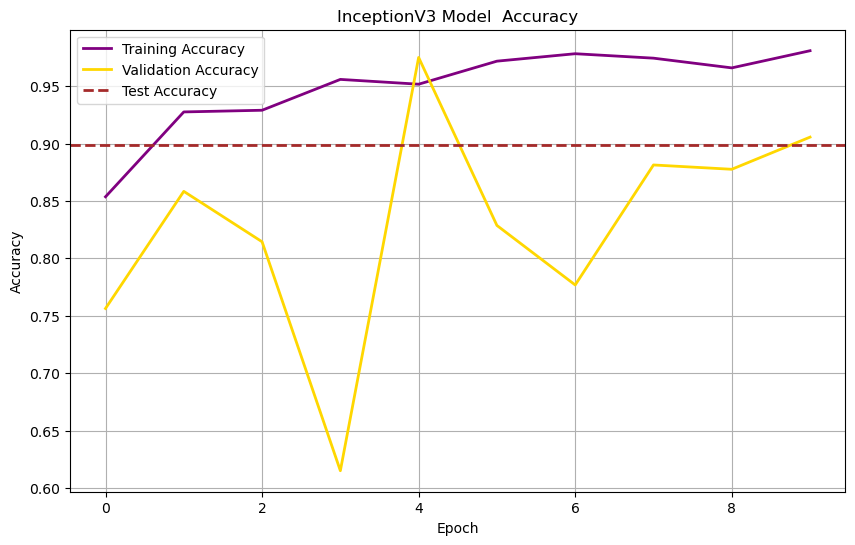

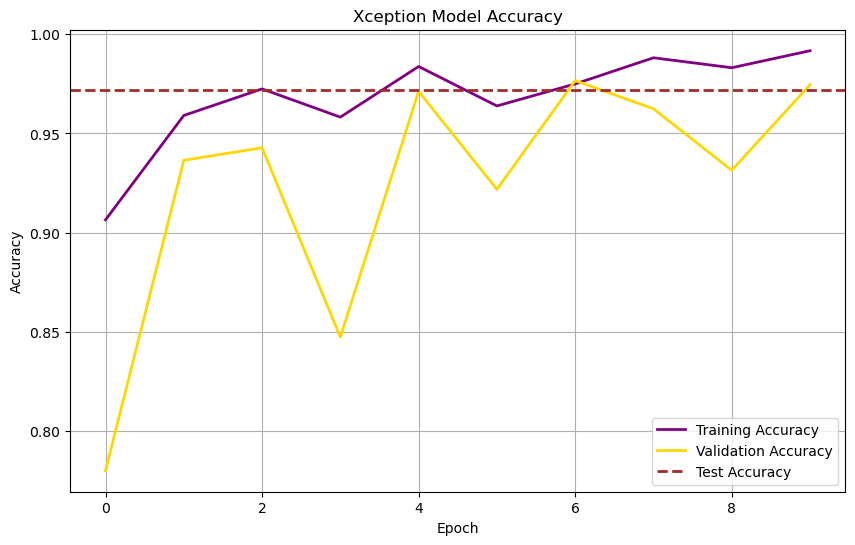

In [32]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy for Model 1
plt.figure(figsize=(10, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy', color='purple', linewidth=2)
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', color='gold', linewidth=2)
plt.axhline(y=test_accuracy1, color='brown', linestyle='--', label='Test Accuracy', linewidth=2)
plt.title('InceptionV3 Model  Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training accuracy and validation accuracy for Model 2
plt.figure(figsize=(10, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy', color='purple', linewidth=2)
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', color='gold', linewidth=2)
plt.axhline(y=test_accuracy2, color='brown', linestyle='--', label='Test Accuracy', linewidth=2)
plt.title('Xception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [15]:
# Build the hybrid model using InceptionV3 and Xception
combined_output = Concatenate()([model1.layers[-2].output, model2.layers[-2].output])  # Concatenate the second last layer outputs
x = Dense(512, activation='relu')(combined_output)
x = Dropout(0.5)(x)
predictions_combined = Dense(num_classes, activation='softmax')(x)
hybrid_model = Model(inputs=[model1.input, model2.input], outputs=predictions_combined)
hybrid_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the hybrid model
start_time_hybrid = time.time()
history_combined = hybrid_model.fit([X_train, X_train], y_train, epochs=10, validation_split=0.2, verbose=1)
end_time_hybrid = time.time()

# Evaluate the hybrid model on the test set
y_pred_combined = hybrid_model.predict([X_test, X_test])
y_pred_combined_classes = np.argmax(y_pred_combined, axis=1)
test_accuracy_combined = np.mean(y_pred_combined_classes == y_true)
precision_combined = precision_score(y_true, y_pred_combined_classes, average='weighted')
recall_combined = recall_score(y_true, y_pred_combined_classes, average='weighted')
f1_score_combined = f1_score(y_true, y_pred_combined_classes, average='weighted')
conf_mat_combined = confusion_matrix(y_true, y_pred_combined_classes)
correct_predictions_combined = np.sum(y_pred_combined_classes == y_true)
incorrect_predictions_combined = len(y_pred_combined_classes) - correct_predictions_combined

# Print metrics for the hybrid model
print("\nHybrid Model Metrics:")
print("Test Accuracy:", test_accuracy_combined)
print("Precision:", precision_combined)
print("Recall:", recall_combined)
print("F1 Score:", f1_score_combined)
print("Confusion Matrix:\n", conf_mat_combined)
print("Correct Predictions:", correct_predictions_combined)
print("Incorrect Predictions:", incorrect_predictions_combined)

# Print runtime information
print("\nRuntime Information:")
print("Individual Model Training Time:", end_time - start_time, "seconds")
print("Hybrid Model Training Time:", end_time_hybrid - start_time_hybrid, "seconds")


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3811s 12s/step - accuracy: 0.8455 - loss: 0.5057 - val_accuracy: 0.9904 - val_loss: 0.0353
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4099s 14s/step - accuracy: 0.9972 - loss: 0.0107 - val_accuracy: 0.9900 - val_loss: 0.0400
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4284s 14s/step - accuracy: 0.9974 - loss: 0.0074 - val_accuracy: 0.9887 - val_loss: 0.0422
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4054s 14s/step - accuracy: 0.9980 - loss: 0.0138 - val_accuracy: 0.9891 - val_loss: 0.0435
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4362s 15s/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9891 - val_loss: 0.0551
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4415s 15s/step - accuracy: 0.9998 - loss: 9.3231e-04 - val_accuracy: 0.9891 - val_loss: 0.0640
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4063s 14s/step - accuracy: 0.9982 - loss: 0.0083 - val_accuracy: 0.9887 - val_loss: 0.0668
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4582s 15s/step - accuracy: 0.9989 - los

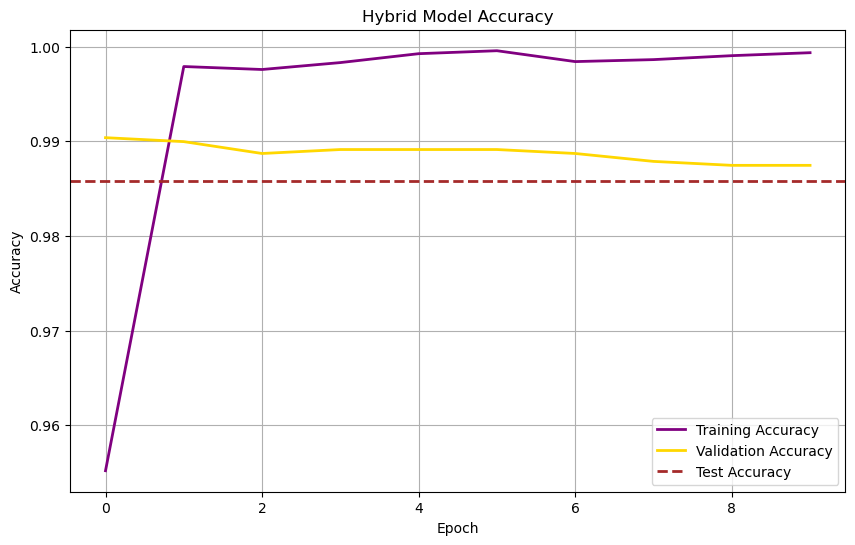

In [31]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy for the hybrid model
plt.figure(figsize=(10, 6))
plt.plot(history_combined.history['accuracy'], label='Training Accuracy', color='purple', linewidth=2)
plt.plot(history_combined.history['val_accuracy'], label='Validation Accuracy', color='gold', linewidth=2)
plt.axhline(y=test_accuracy_combined, color='brown', linestyle='--', label='Test Accuracy', linewidth=2)
plt.title('Hybrid Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#After Shuffling Building InceptionV3 and Xception Models 
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.applications import InceptionV3, Xception
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import time

# Define paths
dataset_path = 'C:\\Blood_Data\\bloodcells_dataset'

# Define image size
img_size = (224, 224)

# Load and preprocess data
X = []
y = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, img_size)
            X.append(image)
            y.append(class_name)

# Shuffle the data
X = np.array(X)
y = np.array(y)
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]

# Convert class labels to numeric format
label_to_index = {label: index for index, label in enumerate(np.unique(y))}
y = np.array([label_to_index[label] for label in y])

# Convert labels to categorical format
num_classes = len(label_to_index)
y = to_categorical(y, num_classes=num_classes)

# Split data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Load the InceptionV3 and Xception base models
base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model2 = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for classification to each base model
output1 = base_model1.output
output1 = GlobalAveragePooling2D()(output1)
output1 = Dense(1024, activation='relu')(output1)
output1 = Dropout(0.5)(output1)
predictions1 = Dense(num_classes, activation='softmax')(output1)

output2 = base_model2.output
output2 = GlobalAveragePooling2D()(output2)
output2 = Dense(1024, activation='relu')(output2)
output2 = Dropout(0.5)(output2)
predictions2 = Dense(num_classes, activation='softmax')(output2)

# Create and compile the individual models
model1 = Model(inputs=base_model1.input, outputs=predictions1)
model2 = Model(inputs=base_model2.input, outputs=predictions2)

for model in [model1, model2]:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the individual models
start_time = time.time()
history1 = model1.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
history2 = model2.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
end_time = time.time()

# Evaluate the individual models on the test set
y_pred1 = model1.predict(X_test)
y_pred1_classes = np.argmax(y_pred1, axis=1)
y_pred2 = model2.predict(X_test)
y_pred2_classes = np.argmax(y_pred2, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics for model 1
test_accuracy1 = np.mean(y_pred1_classes == y_true)
precision1 = precision_score(y_true, y_pred1_classes, average='weighted')
recall1 = recall_score(y_true, y_pred1_classes, average='weighted')
f1_score1 = f1_score(y_true, y_pred1_classes, average='weighted')
conf_mat1 = confusion_matrix(y_true, y_pred1_classes)
correct_predictions1 = np.sum(y_pred1_classes == y_true)
incorrect_predictions1 = len(y_pred1_classes) - correct_predictions1

# Calculate metrics for model 2
test_accuracy2 = np.mean(y_pred2_classes == y_true)
precision2 = precision_score(y_true, y_pred2_classes, average='weighted')
recall2 = recall_score(y_true, y_pred2_classes, average='weighted')
f1_score2 = f1_score(y_true, y_pred2_classes, average='weighted')
conf_mat2 = confusion_matrix(y_true, y_pred2_classes)
correct_predictions2 = np.sum(y_pred2_classes == y_true)
incorrect_predictions2 = len(y_pred2_classes) - correct_predictions2

# Print metrics for model 1
print("Model 1 Metrics:")
print("Test Accuracy:", test_accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_score1)
print("Confusion Matrix:\n", conf_mat1)
print("Correct Predictions:", correct_predictions1)
print("Incorrect Predictions:", incorrect_predictions1)

# Print metrics for model 2
print("\nModel 2 Metrics:")
print("Test Accuracy:", test_accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_score2)
print("Confusion Matrix:\n", conf_mat2)
print("Correct Predictions:", correct_predictions2)
print("Incorrect Predictions:", incorrect_predictions2)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1193s 4s/step - accuracy: 0.7158 - loss: 0.8644 - val_accuracy: 0.5963 - val_loss: 4.7137
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1152s 4s/step - accuracy: 0.9062 - loss: 0.3001 - val_accuracy: 0.5107 - val_loss: 3.9595
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1154s 4s/step - accuracy: 0.9247 - loss: 0.2781 - val_accuracy: 0.9110 - val_loss: 0.2847
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1193s 4s/step - accuracy: 0.9561 - loss: 0.1372 - val_accuracy: 0.6640 - val_loss: 1.7539
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1172s 4s/step - accuracy: 0.9477 - loss: 0.1840 - val_accuracy: 0.9143 - val_loss: 0.3226
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1192s 4s/step - accuracy: 0.9653 - loss: 0.1279 - val_accuracy: 0.8057 - val_loss: 0.6882
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1321s 4s/step - accuracy: 0.9610 - loss: 0.1228 - val_accuracy: 0.9386 - val_loss: 0.2451
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1257s 4s/step - accuracy: 0.9638 - loss: 0.1352 - 

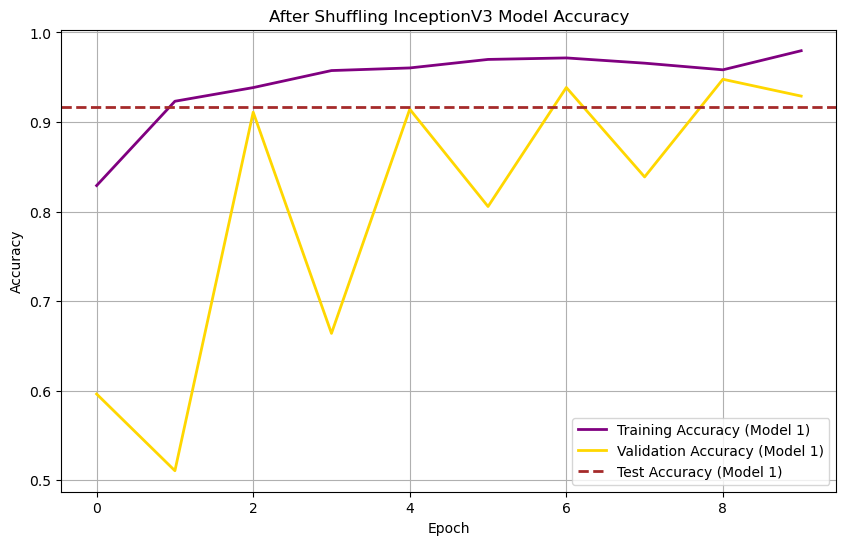

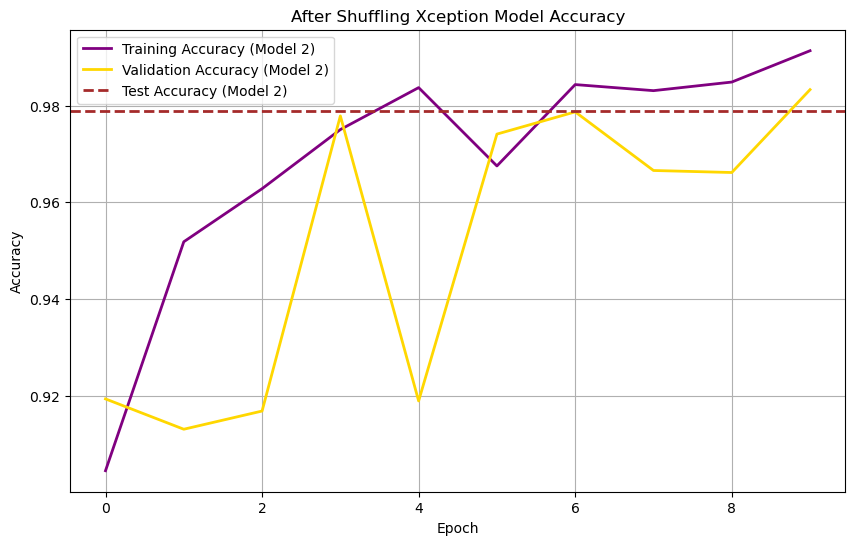

In [12]:
import matplotlib.pyplot as plt

# Plot training accuracy, validation accuracy, and test accuracy for Model 1
plt.figure(figsize=(10, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy (Model 1)', color='purple', linewidth=2)
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy (Model 1)', color='gold', linewidth=2)
plt.axhline(y=test_accuracy1, color='brown', linestyle='--', label='Test Accuracy (Model 1)', linewidth=2)
plt.title('After Shuffling InceptionV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training accuracy, validation accuracy, and test accuracy for Model 2
plt.figure(figsize=(10, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy (Model 2)', color='purple', linewidth=2)
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy (Model 2)', color='gold', linewidth=2)
plt.axhline(y=test_accuracy2, color='brown', linestyle='--', label='Test Accuracy (Model 2)', linewidth=2)
plt.title('After Shuffling Xception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# After Shuffling Building the hybrid model using InceptionV3 and Xception
combined_output = Concatenate()([model1.layers[-2].output, model2.layers[-2].output])  
x = Dense(512, activation='relu')(combined_output)
x = Dropout(0.5)(x)
predictions_combined = Dense(num_classes, activation='softmax')(x)
hybrid_model = Model(inputs=[model1.input, model2.input], outputs=predictions_combined)

# Freeze the weights of model1 and model2
for layer in model1.layers:
    layer.trainable = False
for layer in model2.layers:
    layer.trainable = False

hybrid_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the hybrid model
start_time_hybrid = time.time()
history_combined = hybrid_model.fit([X_train, X_train], y_train, epochs=5, validation_split=0.2, verbose=1)
end_time_hybrid = time.time()

# Evaluate and print metrics for the hybrid model
y_pred_combined = hybrid_model.predict([X_test, X_test])
y_pred_combined_classes = np.argmax(y_pred_combined, axis=1)
test_accuracy_combined = np.mean(y_pred_combined_classes == y_true)
precision_combined = precision_score(y_true, y_pred_combined_classes, average='weighted')
recall_combined = recall_score(y_true, y_pred_combined_classes, average='weighted')
f1_score_combined = f1_score(y_true, y_pred_combined_classes, average='weighted')
conf_mat_combined = confusion_matrix(y_true, y_pred_combined_classes)
correct_predictions_combined = np.sum(y_pred_combined_classes == y_true)
incorrect_predictions_combined = len(y_pred_combined_classes) - correct_predictions_combined

# Print metrics for the hybrid model
print("\nHybrid Model Metrics:")
print("Test Accuracy:", test_accuracy_combined)
print("Precision:", precision_combined)
print("Recall:", recall_combined)
print("F1 Score:", f1_score_combined)
print("Confusion Matrix:\n", conf_mat_combined)
print("Correct Predictions:", correct_predictions_combined)
print("Incorrect Predictions:", incorrect_predictions_combined)

# Print runtime information
print("\nRuntime Information:")
print("Individual Model Training Time:", end_time - start_time, "seconds")
print("Hybrid Model Training Time:", end_time_hybrid - start_time_hybrid, "seconds")
#The hybrid model combines the features extracted by the base models.By concatenating features from multiple models, the hybrid model gains access to a broader range of information about the input data.


Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 988s 3s/step - accuracy: 0.8057 - loss: 0.7452 - val_accuracy: 0.9812 - val_loss: 0.0667
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 951s 3s/step - accuracy: 0.9926 - loss: 0.0306 - val_accuracy: 0.9820 - val_loss: 0.0625
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 951s 3s/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.9824 - val_loss: 0.0720
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 963s 3s/step - accuracy: 0.9957 - loss: 0.0158 - val_accuracy: 0.9829 - val_loss: 0.0731
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 968s 3s/step - accuracy: 0.9975 - loss: 0.0112 - val_accuracy: 0.9837 - val_loss: 0.0713
161/161 ━━━━━━━━━━━━━━━━━━━━ 418s 3s/step

Hybrid Model Metrics:
Test Accuracy: 0.985179407176287
Precision: 0.9853064997019066
Recall: 0.985179407176287
F1 Score: 0.985218998061589
Confusion Matrix:
 [[360   1   0   4   0   0   0   0]
 [  2 929   0   1   0   0   3   0]
 [  0   0 459   3   1   2   0   0]
 [  0   0   1 849   1   2  16   0]
 [  0   0   1   2 3

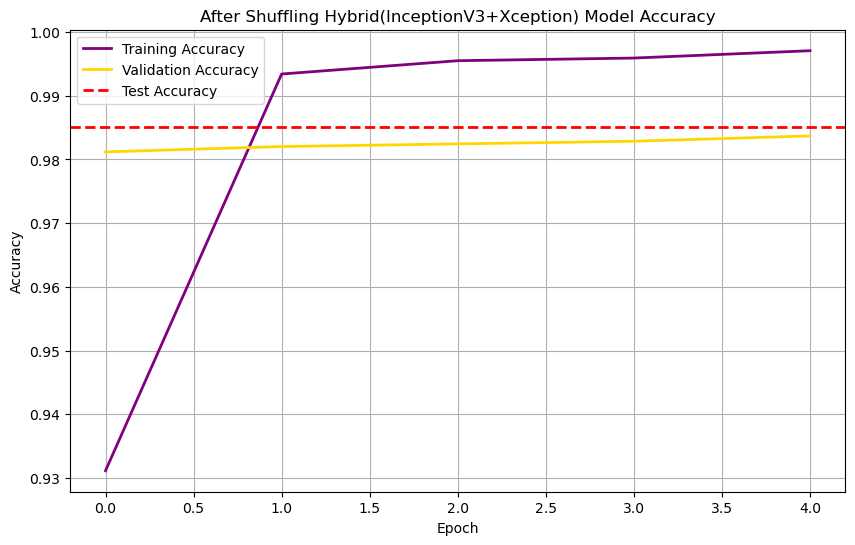

In [7]:
import matplotlib.pyplot as plt

# Plot training accuracy, validation accuracy, and test accuracy for the hybrid model
plt.figure(figsize=(10, 6))
plt.plot(history_combined.history['accuracy'], label='Training Accuracy', color='purple', linewidth=2)
plt.plot(history_combined.history['val_accuracy'], label='Validation Accuracy', color='gold', linewidth=2)
plt.axhline(y=test_accuracy_combined, color='red', linestyle='--', label='Test Accuracy', linewidth=2)
plt.title('After Shuffling Hybrid(InceptionV3+Xception) Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


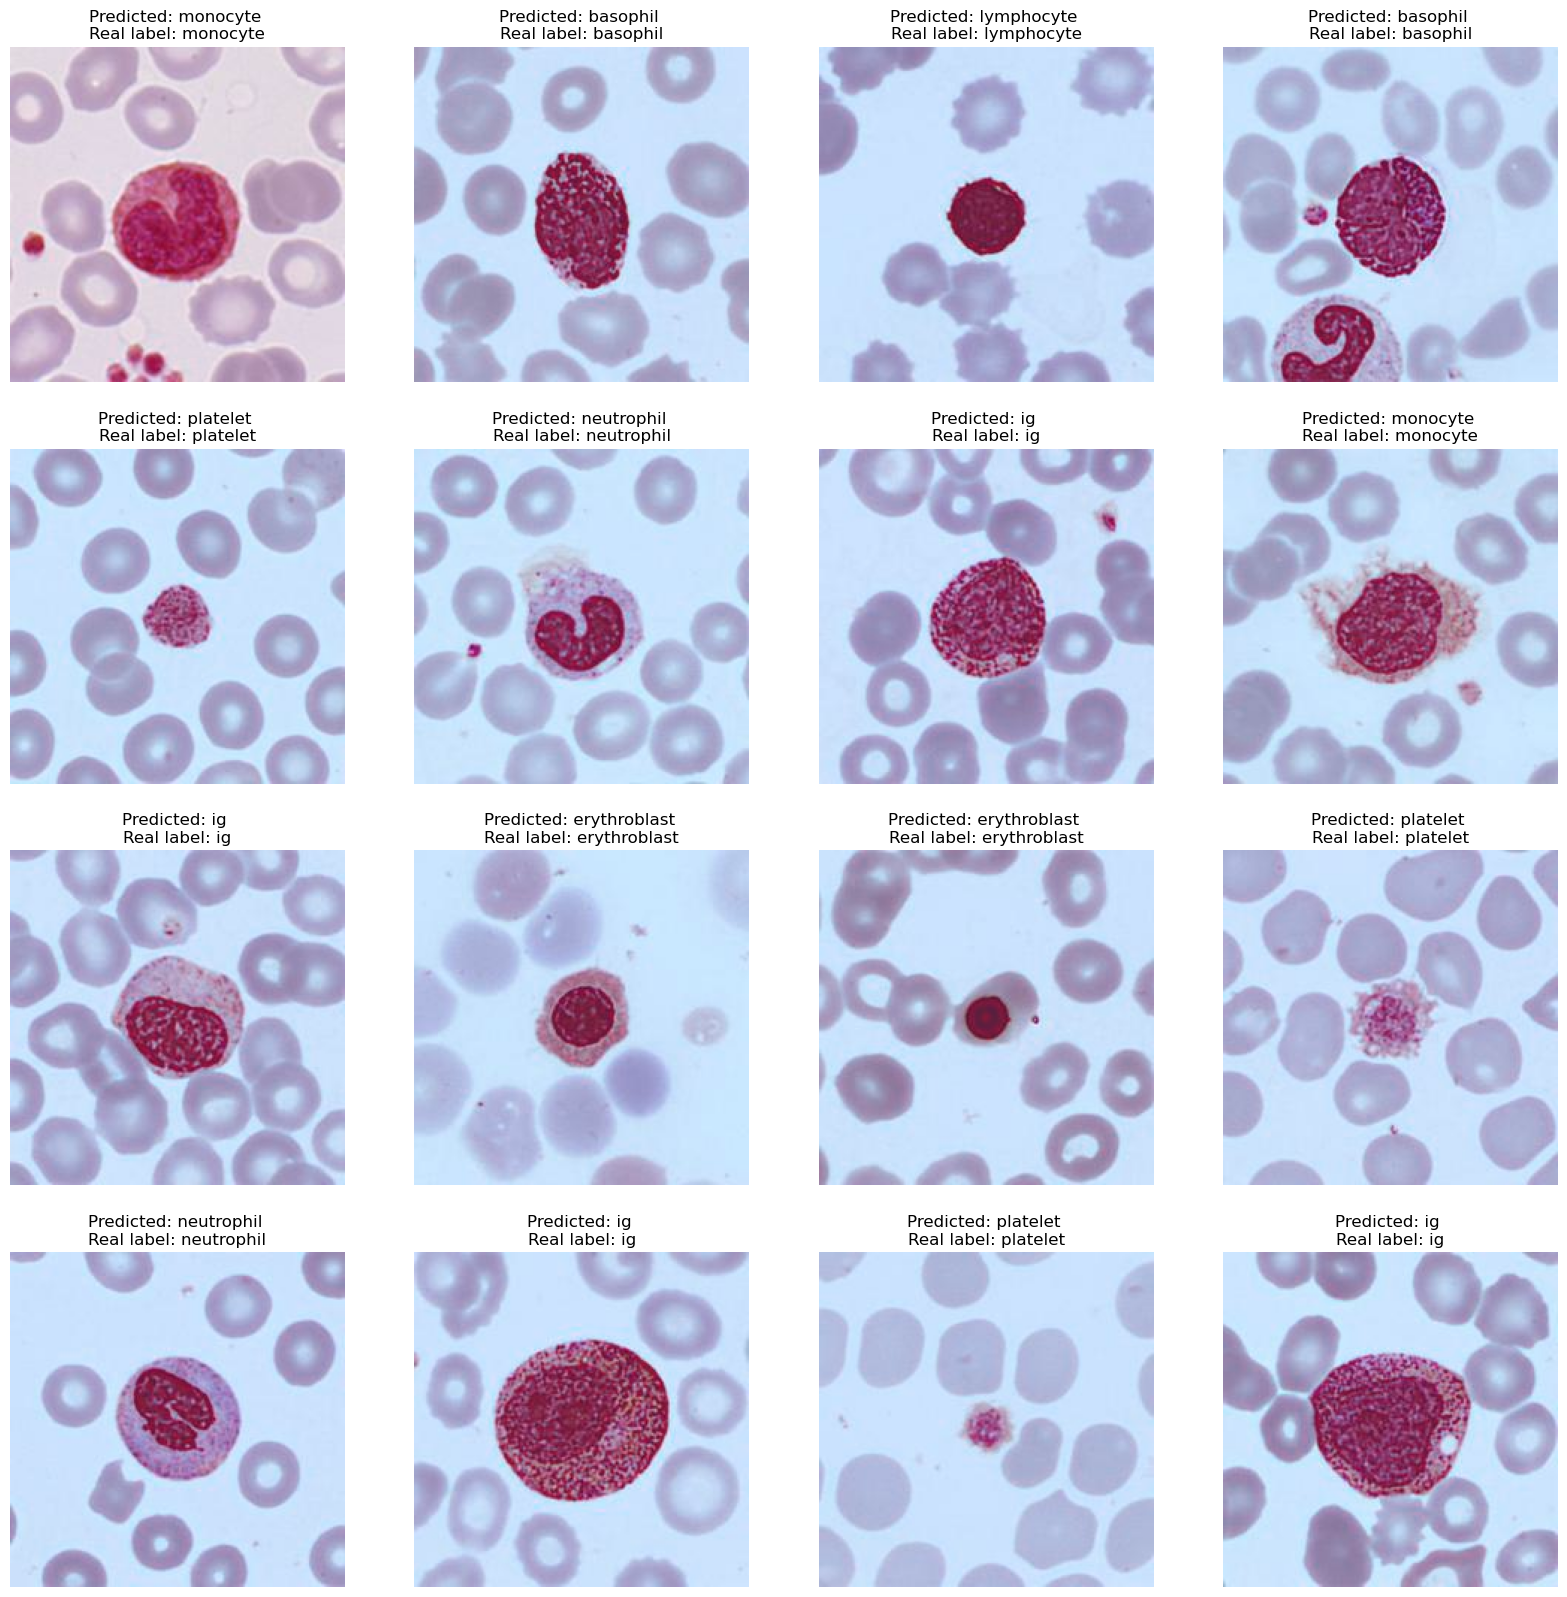

In [10]:
# Define the figure size
plt.figure(figsize=(20, 20))

# Generate random indices for 16 images
random_indices = np.random.choice(len(X_test), size=16, replace=False)

# Generate predictions for the selected images
predictions = hybrid_model.predict([X_test[random_indices], X_test[random_indices]])
predicted_indexes = np.argmax(predictions, axis=1)

# Loop through the selected images
for i, idx in enumerate(random_indices):
    # Create a subplot
    ax = plt.subplot(4, 4, i + 1)

    # Show image
    plt.imshow(X_test[idx].astype("uint8"))

    # Predicted class
    predicted_class = class_names[predicted_indexes[i]]

    # Real class
    real_class = class_names[y_pred_combined_classes[idx]]

    # Set title
    plt.title(f'Predicted: {predicted_class} \nReal label: {real_class}')

    # Turn off axis
    plt.axis("off")

# Show the plot
plt.show()